**Financial time series forecasting with LSTM**

In [ ]:
"""
  Authors : Ali Rabiee, Afshin Karimi
  Affiliation : Sharif University Of Technology
  Title : Financial time series forecasting with LSTM
  Email : alirabiee1997@gmail.com
"""

      USDRL   OPEC         Gold     X50C  ...  Banks   Food   Bimeh   Fnafti
Days                                      ...                               
1     10486  72.64  1224.500000  19910.2  ...  220.3  559.6  2608.9  31196.0
2     10462  72.27  1224.500000  19918.5  ...  221.0  561.8  2688.9  31114.5
3     10443  73.25  1226.599976  20116.2  ...  222.2  564.8  2748.7  31089.7
4     10450  73.05  1229.699951  20292.2  ...  225.6  564.9  2817.4  31502.9
5     10460  73.03  1233.800049  20292.2  ...  225.6  564.9  2817.4  31502.9

[5 rows x 18 columns]


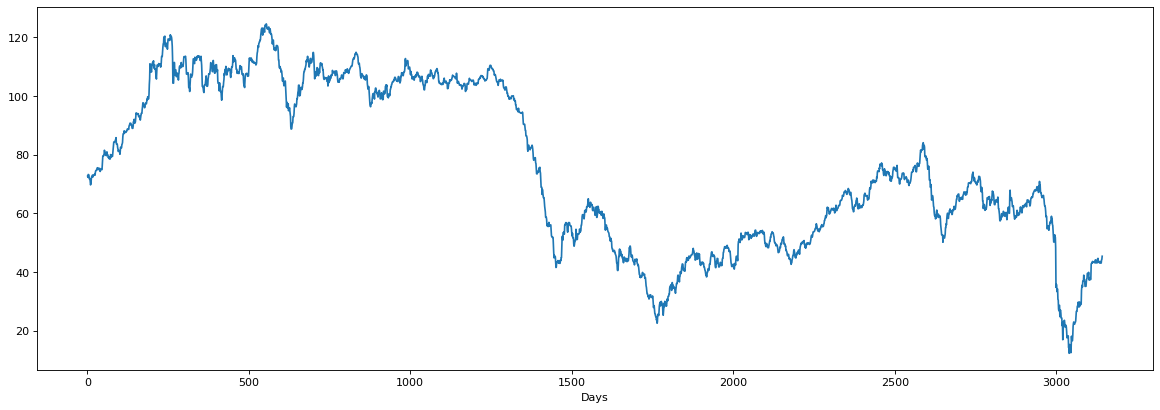

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

series = pd.read_csv('Data_all.csv')
Days = range(1,len(series)+1)
series.insert(0, "Days", Days)
series.to_csv("new_Data_all.csv", index=False)
series = pd.read_csv('new_Data_all.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)
print(series.head())

figure(num=None, figsize=(18, 6), dpi=80, facecolor='w', edgecolor='k')
series["OPEC"].plot()
plt.show()

In [ ]:
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back = 1): 
	dataX, dataY = [], []
	for i in range(len(dataset) - look_back - 1):
		a = dataset[i:(i + look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
 
# fix random seed for reproducibility
numpy.random.seed(7)

In [ ]:
# dataset Preparation

# load the dataset
dataframe = read_csv('new_Data_all.csv', usecols = [2], engine = 'python') 
'''
change usecols from 1 to 18 for different category
'''
dataset = dataframe.values
dataset = dataset.astype('float32')

# normalize the dataset
scaler = MinMaxScaler(feature_range = (0, 1))
dataset = scaler.fit_transform(dataset)

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# reshape into X = t and Y = t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

Epoch 1/100
2103/2103 - 3s - loss: 0.0284
Epoch 2/100
2103/2103 - 2s - loss: 1.0439e-04
Epoch 3/100
2103/2103 - 2s - loss: 8.5225e-05
Epoch 4/100
2103/2103 - 2s - loss: 9.0314e-05
Epoch 5/100
2103/2103 - 2s - loss: 9.3148e-05
Epoch 6/100
2103/2103 - 2s - loss: 9.2749e-05
Epoch 7/100
2103/2103 - 2s - loss: 9.0353e-05
Epoch 8/100
2103/2103 - 2s - loss: 9.1703e-05
Epoch 9/100
2103/2103 - 2s - loss: 8.8057e-05
Epoch 10/100
2103/2103 - 2s - loss: 9.2869e-05
Epoch 11/100
2103/2103 - 2s - loss: 9.2149e-05
Epoch 12/100
2103/2103 - 2s - loss: 9.0811e-05
Epoch 13/100
2103/2103 - 2s - loss: 8.9009e-05
Epoch 14/100
2103/2103 - 2s - loss: 9.1659e-05
Epoch 15/100
2103/2103 - 2s - loss: 9.0011e-05
Epoch 16/100
2103/2103 - 2s - loss: 8.7922e-05
Epoch 17/100
2103/2103 - 2s - loss: 8.9315e-05
Epoch 18/100
2103/2103 - 2s - loss: 8.8263e-05
Epoch 19/100
2103/2103 - 2s - loss: 9.1268e-05
Epoch 20/100
2103/2103 - 2s - loss: 9.0329e-05
Epoch 21/100
2103/2103 - 2s - loss: 8.7239e-05
Epoch 22/100
2103/2103 - 2

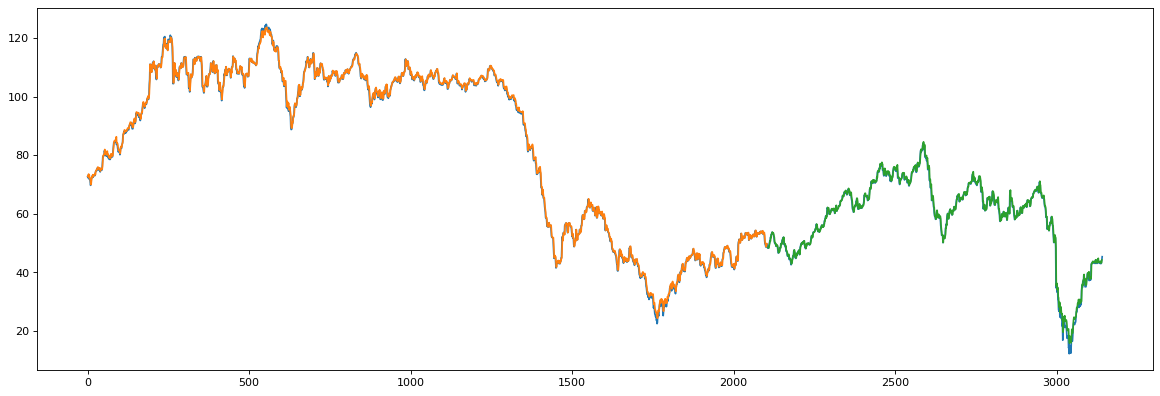

In [ ]:
# applying LSTM

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape = (1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs = 100, batch_size = 1, verbose = 2)

# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict) + look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict) + (look_back * 2) + 1:len(dataset) - 1, :] = testPredict

# plot baseline and predictions
figure(num=None, figsize=(18, 6), dpi = 80, facecolor = 'w', edgecolor = 'k')
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()
